In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/')
import psix
from matplotlib.gridspec import GridSpec


cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

For guidance, Nature’s standard figure sizes are 89 mm (single column) and 183 mm (double column) and the full depth of the page is 247 mm.

In [2]:
meta = pd.read_csv('single_lineage/sim_output/meta.tab.gz', sep='\t')
meta.index=['cell_'+str(i+1) for i in range(1000)]

pop_1 = meta.loc[meta['pop'] == '3_1'].index
pop_2 = meta.loc[meta['pop'] == '3_2'].index
labels = [pop_1, pop_2]

In [3]:
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests


def run_kw(exon_psi, labels):
    kw_input = []
    for l in labels:
        kw_input.append(list(exon_psi[l]))
        
    if len(labels) == 2:
        return kruskal(kw_input[0], kw_input[1], nan_policy='omit')
    if len(labels) == 3:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], nan_policy='omit')
    if len(labels) == 4:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], nan_policy='omit')
    if len(labels) == 5:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], nan_policy='omit')
    if len(labels) == 6:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], nan_policy='omit')
    if len(labels) == 7:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], nan_policy='omit')
    if len(labels) == 8:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], kw_input[7], nan_policy='omit')
    
def run_kw_dset(psi_table, labels, exon_list):
    kw_output = pd.DataFrame()
    kw_score = []
    pvals = []
    for exon in tqdm(exon_list, position=0, leave=True):
        score, p = run_kw(psi_table.loc[exon], labels)
        kw_score.append(score)
        pvals.append(p)
    kw_output['KW_score'] = kw_score
    kw_output['pvals'] = pvals
    kw_output['qvals'] = multipletests(pvals, method='fdr_bh')[1]
    kw_output.index = exon_list
    return kw_output



In [4]:
psix_single_lineage_1 = psix.Psix()
psix_single_lineage_1.process_rnaseq(
        'single_lineage/processed_tables/SE_counts_0.1.tab.gz',
        'single_lineage/processed_tables/constitutive_introns_0.1.tab.gz',
        'single_lineage/processed_tables/tpm_0.1.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)



psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_1 = psix_single_lineage_1.psix_results

kw_1 = run_kw_dset(psix_single_lineage_1.adata.uns['psi'][psix_results_1.index].T, 
                         labels, psix_results_1.index)

gearyc_1 = pd.read_csv('single_lineage/gearyc_0.1.tab.gz', sep='\t', index_col=0)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 3400.06it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:33<00:00, 104.88it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


  0%|          | 9/3486 [00:00<00:39, 88.52it/s]

Successfully estimated p-values


100%|██████████| 3486/3486 [00:28<00:00, 121.77it/s]


In [5]:
psix_single_lineage_05 = psix.Psix()
psix_single_lineage_05.process_rnaseq(
        'single_lineage/processed_tables/SE_counts_0.05.tab.gz',
        'single_lineage/processed_tables/constitutive_introns_0.05.tab.gz',
        'single_lineage/processed_tables/tpm_0.05.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)



psix_single_lineage_05.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_05 = psix_single_lineage_05.psix_results

kw_05 = run_kw_dset(psix_single_lineage_05.adata.uns['psi'][psix_results_05.index].T, 
                         labels, psix_results_05.index)

gearyc_05 = pd.read_csv('single_lineage/gearyc_0.05.tab.gz', sep='\t', index_col=0)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


100%|██████████| 1000/1000 [00:00<00:00, 7794.03it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3244 exons



100%|██████████| 3244/3244 [00:33<00:00, 98.24it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


  0%|          | 11/3244 [00:00<00:29, 108.59it/s]

Successfully estimated p-values


100%|██████████| 3244/3244 [00:25<00:00, 129.53it/s]


In [6]:
psix_single_lineage_01 = psix.Psix()
psix_single_lineage_01.process_rnaseq(
        'single_lineage/processed_tables/SE_counts_0.01.tab.gz',
        'single_lineage/processed_tables/constitutive_introns_0.01.tab.gz',
        'single_lineage/processed_tables/tpm_0.01.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)


psix_single_lineage_01.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_01 = psix_single_lineage_01.psix_results

kw_01 = run_kw_dset(psix_single_lineage_01.adata.uns['psi'][psix_results_01.index].T, 
                         labels, psix_results_01.index)

gearyc_01 = pd.read_csv('single_lineage/gearyc_0.01.tab.gz', sep='\t', index_col=0)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


100%|██████████| 1000/1000 [00:00<00:00, 7678.29it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:27<00:00, 76.84it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


  1%|          | 17/2097 [00:00<00:13, 158.92it/s]

Successfully estimated p-values


100%|██████████| 2097/2097 [00:14<00:00, 144.90it/s]


In [7]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


platonic_psi = pd.read_csv('single_lineage/sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)

psix_1_auc = []
kw_1_auc = []
gearyc_1_auc = []
    
for i in tqdm(range(200)):
    
    pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
    neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)
    
    labels = [1]*len(pos_sample) + [0]*len(neg_sample)
    order = list(pos_sample) + list(neg_sample)

    
    y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


    pre, rec, thres = precision_recall_curve(y_, psix_results_1.loc[order].psix_score)
    pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw_1.loc[order].KW_score)
    pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_1.loc[order].C_score)

    psix_1_auc.append(auc(rec, pre))
    kw_1_auc.append(auc(rec_kw, pre_kw))
    gearyc_1_auc.append(auc(rec_c, pre_c))

100%|██████████| 200/200 [00:06<00:00, 30.63it/s]


100%|██████████| 200/200 [00:06<00:00, 31.26it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

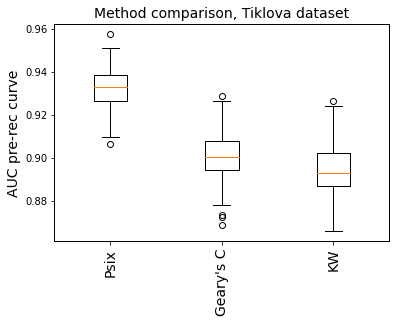

In [8]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_05.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_05.index


psix_05_auc = []
kw_05_auc = []
gearyc_05_auc = []
    
for i in tqdm(range(200)):
    
    pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
    neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)
    
    labels = [1]*len(pos_sample) + [0]*len(neg_sample)
    order = list(pos_sample) + list(neg_sample)

    
    y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


    pre, rec, thres = precision_recall_curve(y_, psix_results_05.loc[order].psix_score)
    pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw_05.loc[order].KW_score)
    pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_05.loc[order].C_score)

    psix_05_auc.append(auc(rec, pre))
    kw_05_auc.append(auc(rec_kw, pre_kw))
    gearyc_05_auc.append(auc(rec_c, pre_c))
    
boxplots = [ psix_05_auc, gearyc_05_auc, kw_05_auc]



bp = plt.boxplot(boxplots)


plt.xticks(np.arange(1, 4), 
           ['Psix', "Geary's C", 'KW'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

100%|██████████| 200/200 [00:06<00:00, 32.62it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

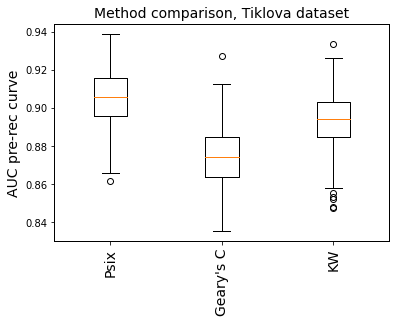

In [9]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_01.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_01.index


psix_01_auc = []
kw_01_auc = []
gearyc_01_auc = []
    
for i in tqdm(range(200)):
    
    pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
    neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)
    
    labels = [1]*len(pos_sample) + [0]*len(neg_sample)
    order = list(pos_sample) + list(neg_sample)

    
    y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


    pre, rec, thres = precision_recall_curve(y_, psix_results_01.loc[order].psix_score)
    pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw_01.loc[order].KW_score)
    pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_01.loc[order].C_score)

    psix_01_auc.append(auc(rec, pre))
    kw_01_auc.append(auc(rec_kw, pre_kw))
    gearyc_01_auc.append(auc(rec_c, pre_c))
    
boxplots = [ psix_01_auc, gearyc_01_auc, kw_01_auc]



bp = plt.boxplot(boxplots)


plt.xticks(np.arange(1, 4), 
           ['Psix', "Geary's C", 'KW'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

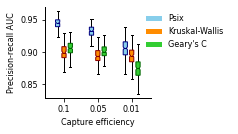

In [10]:
fig = plt.figure(figsize=(8/2.4, 4/2.4))
gs = GridSpec(1,7)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=8)
ax.set_xlabel('Capture efficiency', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([-0.5, 12])

ax_2.set_xlim([0, 0])

ax_2.hist([-1, -1], color='skyblue', label='Psix')
ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

ax_2.spines["bottom"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)

ax_2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,  
    right=False,
    left=False, # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)

ax_2.legend(frameon=False, fontsize=8)

plt.savefig('plots/single_lineage_auc.png', bbox_inches='tight', res=20000, dpi =2000)

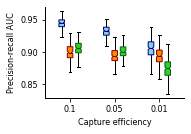

In [11]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=8)
ax.set_xlabel('Capture efficiency', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([-0.5, 12])

# ax_2.set_xlim([0, 0])

# ax_2.hist([-1, -1], color='skyblue', label='Psix')
# ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
# ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

# ax_2.spines["bottom"].set_visible(False)
# ax_2.spines["top"].set_visible(False)
# ax_2.spines["right"].set_visible(False)
# ax_2.spines["left"].set_visible(False)

# ax_2.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,  
#     right=False,
#     left=False, # ticks along the top edge are off
#     labelleft=False,
#     labelbottom=False)

# ax_2.legend(frameon=False, fontsize=8)

plt.savefig('plots/single_lineage_auc.png', bbox_inches='tight', res=20000, dpi =2000)

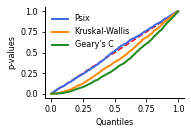

In [68]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6/2.4, 4/2.4))

ax = fig.add_subplot(111)
ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))), c='red',
        linestyle='--')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(psix_results_1.loc[neg].pvals), label='Psix', linewidth=2, c='royalblue')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(kw_1.loc[neg].pvals), label='Kruskal-Wallis', linewidth=2, c='darkorange')

# plt.scatter(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(hs_results.loc[neg].Pval)))


ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(gearyc_1.loc[neg].pvals), label="Geary's C", linewidth=2, c='forestgreen')


ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_xlabel('Quantiles', size=8)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_ylabel('p-values', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=8)

plt.savefig('plots/single_lineage_pvals.png', bbox_inches='tight', res=20000, dpi =2000)

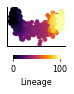

In [137]:
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=meta.lineage_depth, cmap='inferno', vmin=0, s=20, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='Lineage',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)



# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)

# ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_xlabel('PC 1', size=8)
# ax.set_ylabel('PC 2', size=8)

# ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_ylabel('p-values', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

# ax.legend(frameon=False, fontsize=18)

plt.savefig('plots/single_lineage.png', bbox_inches='tight', res=20000, dpi =2000)

In [60]:
underlying_psi = pd.read_csv('single_lineage/sim_output/psi_underlying.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
underlying_psi.index = ['gene' + str(i+1) for i in range(5000)]

underlying_psi = expit(underlying_psi)


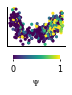

In [126]:
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psix_single_lineage_1.adata.uns['psi']['gene316'], vmin=0, vmax=1, s=10, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='$\Psi$',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)


# plt.title('Positives')
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('plots/positive_pca.png', bbox_inches='tight', res=20000, dpi =2000)

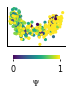

In [127]:
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psix_single_lineage_1.adata.uns['psi']['gene4452'], vmin=0, vmax=1, s=10, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='$\Psi$',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)


# plt.title('Positives')
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('plots/negative_pca.png', bbox_inches='tight', res=20000, dpi =2000)

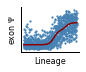

In [131]:
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, underlying_psi.loc['gene316'], c='steelblue', s=5, linewidth=0)
ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
        platonic_psi.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('exon $\Psi$', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.05, 1.05)

plt.savefig('plots/positive_psi.png', bbox_inches='tight', res=20000, dpi =2000)

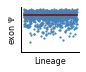

In [132]:
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, underlying_psi.loc['gene4452'], c='steelblue', s=5, linewidth=0)
ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
        platonic_psi.loc['gene4452', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('exon $\Psi$', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.05, 1.05)


plt.savefig('plots/negative_psi.png', bbox_inches='tight', res=20000, dpi =2000)

In [114]:
gene_expression = pd.read_csv('single_lineage/sim_output/gene_counts.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
gene_expression.index = ['gene' + str(i+1) for i in range(5000)]

# gene_expression = expit(ungene_expression)


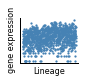

In [143]:

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, np.log1p(gene_expression.loc['gene316']), c='steelblue', s=5, linewidth=0)
# ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
#        gene_expression.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('gene expression', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_ylim(-0.05, 1.05)

plt.savefig('plots/positive_gene.png', bbox_inches='tight', res=20000, dpi =2000)

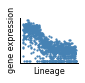

In [144]:

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, np.log1p(gene_expression.loc['gene4452']), c='steelblue', s=5, linewidth=0)
# ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
#        gene_expression.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('gene expression', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_ylim(-0.05, 1.05)

plt.savefig('plots/negative_gene.png', bbox_inches='tight', res=20000, dpi =2000)

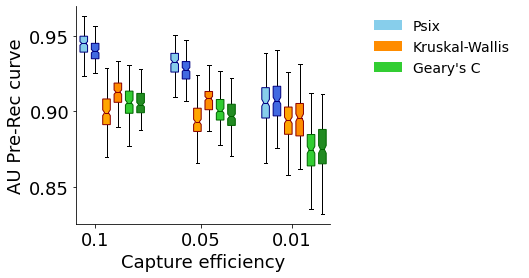

In [25]:
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,7)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,7,13], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([psix_1_auc_, psix_05_auc_, psix_01_auc_], positions=[1.75,7.75,13.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='royalblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[2.5,8.5,14.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='orange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([kw_1_auc_, kw_05_auc_, kw_01_auc_], positions=[3.25,9.25,15.25], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[4,10,16], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.boxplot([gearyc_1_auc_, gearyc_05_auc_, gearyc_01_auc_], positions=[4.75,10.75,16.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='forestgreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 8.75, 14.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=18)
ax.set_xlabel('Capture efficiency', size=18)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=18)
ax.set_ylabel('AU Pre-Rec curve', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.set_xlim([0, 0])

ax_2.hist([-1, -1], color='skyblue', label='Psix')
ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

ax_2.spines["bottom"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)

ax_2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,  
    right=False,
    left=False, # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)

ax_2.legend(frameon=False, fontsize=14)

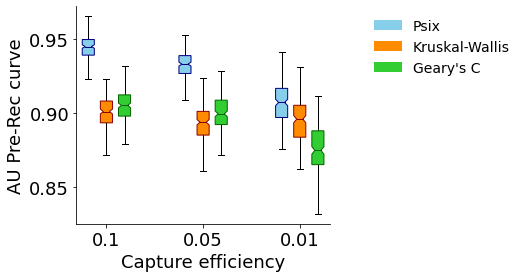

In [17]:
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,7)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=18)
ax.set_xlabel('Capture efficiency', size=18)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=18)
ax.set_ylabel('AU Pre-Rec curve', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.set_xlim([0, 0])

ax_2.hist([-1, -1], color='skyblue', label='Psix')
ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

ax_2.spines["bottom"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)

ax_2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,  
    right=False,
    left=False, # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)

ax_2.legend(frameon=False, fontsize=14)

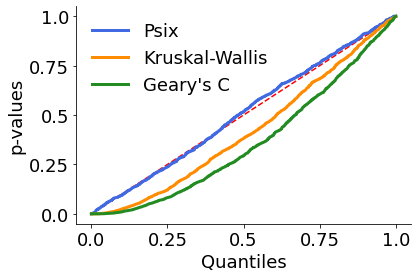

In [42]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(111)
ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))), c='red',
        linestyle='--')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(psix_results_1.loc[neg].pvals), label='Psix', linewidth=3, c='royalblue')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(kw_1.loc[neg].pvals), label='Kruskal-Wallis', linewidth=3, c='darkorange')

# plt.scatter(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(hs_results.loc[neg].Pval)))


ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(gearyc_1.loc[neg].pvals), label="Geary's C", linewidth=3, c='forestgreen')


ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
ax.set_xlabel('Quantiles', size=18)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
ax.set_ylabel('p-values', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=18)


In [47]:
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)
meta = pd.read_csv('single_lineage/sim_output/meta.tab.gz', sep='\t')

No handles with labels found to put in legend.


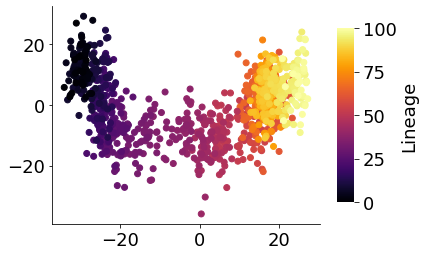

In [76]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=meta.lineage_depth, cmap='inferno', vmin=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10)
cb.set_label(label='Lineage',size=18)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=18, length=5)

ax.tick_params(labelsize=18)
# ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_xlabel('Quantiles', size=18)

# ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_ylabel('p-values', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=18)



In [79]:
psi = psix_single_lineage_1.adata.uns['psi'].T

No handles with labels found to put in legend.


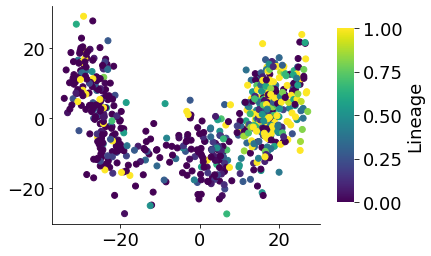

In [86]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psi.loc['gene316'], vmin=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10)
cb.set_label(label='Lineage',size=18)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=18, length=5)

ax.tick_params(labelsize=18)
# ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_xlabel('Quantiles', size=18)

# ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_ylabel('p-values', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=18)



No handles with labels found to put in legend.


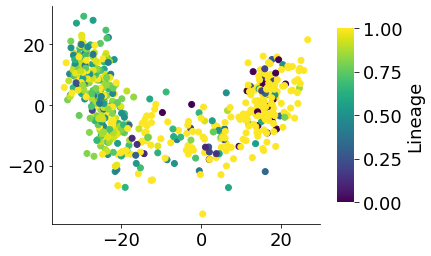

In [92]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psi.loc['gene4452'], vmin=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10)
cb.set_label(label='Lineage',size=18)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=18, length=5)

ax.tick_params(labelsize=18)
# ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_xlabel('Quantiles', size=18)

# ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=18)
# ax.set_ylabel('p-values', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=18)



In [89]:
kw_1.loc[neg].sort_values('KW_score')

,KW_score,pvals,qvals
gene2634,6.659810e-07,9.993489e-01,9.993489e-01
gene4421,7.007833e-07,9.993321e-01,9.993489e-01
gene4565,2.903117e-06,9.986405e-01,9.992138e-01
gene4281,3.727466e-06,9.984596e-01,9.992138e-01
gene3312,6.929430e-06,9.978997e-01,9.990460e-01
...,...,...,...
gene3172,3.914725e+01,3.930167e-10,2.174692e-09
gene3034,4.082304e+01,1.666566e-10,9.508428e-10
gene2958,4.950388e+01,1.979794e-12,1.327224e-11
gene4452,5.200349e+01,5.540208e-13,3.852791e-12


In [93]:
psix_results_1.loc['gene4452']

psix_score   -0.044894
pvals         1.000000
qvals         1.000000
Name: gene4452, dtype: float64

Text(0.5, 0, '-log10 p-values')

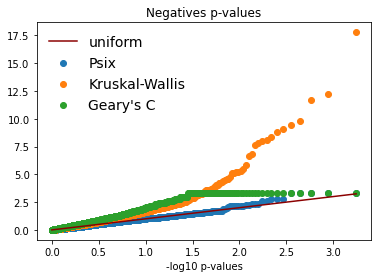

In [32]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(psix_results_1.loc[neg].pvals)), label='Psix')

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(kw_1.loc[neg].pvals)), label='Kruskal-Wallis')

# plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(-np.log10(hs_results.loc[neg].Pval)))


plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(gearyc_1.loc[neg].pvals)), label="Geary's C")

plt.plot(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))), c='darkred', label='uniform')

plt.legend(frameon=False, fontsize=14)
plt.title('Negatives p-values')
plt.xlabel('theoretical -log10 p-values')

plt.xlabel('-log10 p-values')
# plt.ylim((0, 5))

(0.0, 5.0)

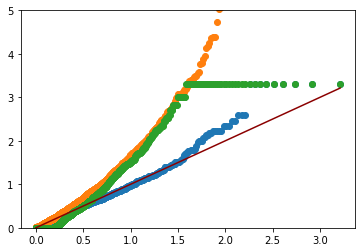

In [100]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_05.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_05.index

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(psix_results_05.loc[neg].pvals)))

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(kw_05.loc[neg].pvals)))

# plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(-np.log10(hs_results.loc[neg].Pval)))


plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(gearyc_05.loc[neg].pvals)))

plt.plot(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))), c='darkred')

plt.ylim((0, 5))

In [39]:
# from sklearn.cluster import AgglomerativeClustering
# ac = AgglomerativeClustering(3)

# rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)
# labels_ac = ac.fit_predict(rd)

# labels = [rd.loc[labels_ac==0].index, rd.loc[labels_ac==1].index, rd.loc[labels_ac==2].index]

In [60]:
pop_1 = meta.loc[meta['pop'] == '3_1'].index
pop_2 = meta.loc[meta['pop'] == '3_2'].index
labels = [pop_1, pop_2]

tiklova_kw = run_kw_dset(psix_single_lineage.adata.uns['psi'][psix_single_lineage.psix_results.index].T, 
                         labels, psix_single_lineage.psix_results.index)

(array([1446.,  174.,  145.,  116.,  131.,  102.,  104.,  101.,   80.,
          85.,   91.,   96.,   93.,  125.,   89.,   99.,  100.,   96.,
         106.,  107.]),
 array([4.99750125e-04, 5.04747626e-02, 1.00449775e-01, 1.50424788e-01,
        2.00399800e-01, 2.50374813e-01, 3.00349825e-01, 3.50324838e-01,
        4.00299850e-01, 4.50274863e-01, 5.00249875e-01, 5.50224888e-01,
        6.00199900e-01, 6.50174913e-01, 7.00149925e-01, 7.50124938e-01,
        8.00099950e-01, 8.50074963e-01, 9.00049975e-01, 9.50024988e-01,
        1.00000000e+00]),
 <a list of 20 Patch objects>)

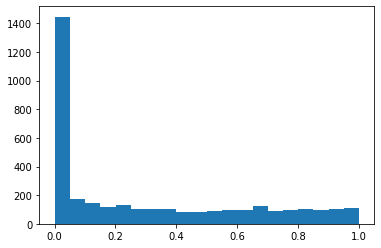

In [27]:
plt.hist(psix_single_lineage.psix_results.pvals, bins=20)#.index

100%|██████████| 3486/3486 [00:26<00:00, 131.99it/s]


In [46]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

In [47]:
platonic_psi = pd.read_csv('single_lineage/sim_output/psi_platonic.tab.gz', sep='\t', 
                           names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

from scipy.special import logit, expit
platonic_psi = expit(platonic_psi)

In [48]:
y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

In [75]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

pre, rec, thres = precision_recall_curve(y_, psix_results_1.loc[order].psix_score)
pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw_1.loc[order].KW_score)
pre_h, rec_h, thres_h = precision_recall_curve(y_, gearyc_1.loc[order].C_score)

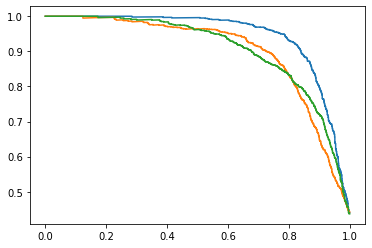

In [76]:
plt.plot(rec, pre)
plt.plot(rec_kw, pre_kw)
plt.plot(rec_h, pre_h)

In [57]:
auc(rec_h, pre_h)

0.9053102273684298

In [ ]:
recall_score(y_, psix_results.qvals <= 0.05)

In [199]:
import hotspot
rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

psi_table = psix_single_lineage.adata.uns['psi'][psix_single_lineage.psix_results.index].T
psi_tab_imputed = psi_table.T.fillna(psi_table.T.mean(axis=0)).T
hs = hotspot.Hotspot(psi_tab_imputed, model='none', latent=rd, umi_counts=np.ones(len(psi_table.columns)))
hs.create_knn_graph(weighted_graph=False, n_neighbors=100)
hs_results = hs.compute_autocorrelations()

100%|██████████| 3486/3486 [00:00<00:00, 5487.77it/s]


In [43]:
plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(psix_results.loc[neg].pvals)))

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(tiklova_kw.loc[neg].pvals)))

# plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(-np.log10(hs_results.loc[neg].Pval)))


plt.scatter(sorted(-np.log10(np.arange(0+(1/1149), 1+(1/1149), step = 1/1149))),
            sorted(-np.log10(gearyc.loc[gearyc.loc[gearyc.C_score > 0].index & pd.Index(neg)].pvals)))

plt.plot(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))), c='darkred')

plt.ylim((0, 5))

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_991,cell_992,cell_993,cell_994,cell_995,cell_996,cell_997,cell_998,cell_999,cell_1000
gene1128,1.000000,0.200000,1.000000,1.000000,0.529412,0.846154,1.000000,1.000000,0.000000,0.764706,...,0.538129,0.000000,0.538129,0.000000,0.000000,0.000000,0.538129,0.272727,0.538129,0.000000
gene1880,0.128205,0.000000,0.176471,0.000000,0.333333,0.414634,0.000000,0.381428,0.381428,0.111111,...,1.000000,1.000000,0.606061,0.381428,0.600000,1.000000,1.000000,1.000000,0.600000,1.000000
gene2332,0.500000,1.000000,0.750000,0.846154,0.714286,0.531915,0.625000,0.733333,1.000000,0.529412,...,1.000000,1.000000,0.818182,1.000000,1.000000,1.000000,1.000000,1.000000,0.769231,0.846154
gene705,0.534922,0.534922,0.000000,0.534922,0.534922,0.000000,0.000000,0.534922,0.534922,0.534922,...,0.534922,0.534922,1.000000,1.000000,1.000000,1.000000,0.629630,0.534922,0.534922,1.000000
gene1878,0.000000,0.000000,0.000000,0.000000,0.250000,0.015873,0.125000,0.166667,0.333333,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,0.349769,0.250000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene4900,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.103153,0.103153,0.103153,0.000000,...,0.000000,0.103153,0.103153,0.103153,0.103153,0.000000,0.103153,0.103153,0.000000,0.103153
gene3637,0.483050,0.483050,0.483050,0.483050,0.483050,0.483050,0.483050,0.483050,0.483050,0.483050,...,0.483050,0.483050,1.000000,0.483050,0.483050,0.483050,0.483050,0.483050,0.483050,0.000000
gene3293,0.300331,0.300331,1.000000,0.300331,0.300331,1.000000,0.300331,0.300331,0.300331,1.000000,...,1.000000,0.300331,0.300331,0.300331,0.300331,0.300331,0.000000,0.300331,0.300331,0.300331
gene2372,0.327466,0.327466,0.090909,0.000000,0.327466,0.327466,0.000000,0.327466,0.327466,0.327466,...,0.327466,0.200000,0.327466,0.000000,0.327466,0.327466,0.000000,0.327466,0.327466,0.327466


In [29]:
psi_tab_imputed = psi_table.T.fillna(psi_table.T.mean(axis=0)).T

In [39]:
psi_tab_imputed

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_991,cell_992,cell_993,cell_994,cell_995,cell_996,cell_997,cell_998,cell_999,cell_1000
gene1128,1.000000,0.200000,1.000000,1.000000,0.529412,0.846154,1.00000,1.000000,0.000000,0.764706,...,0.56129,0.000000,0.551298,0.000000,0.000000,0.000000,0.544963,0.272727,0.563838,0.000000
gene1880,0.128205,0.000000,0.176471,0.000000,0.333333,0.414634,0.00000,0.558837,0.569369,0.111111,...,1.00000,1.000000,0.606061,0.547775,0.600000,1.000000,1.000000,1.000000,0.600000,1.000000
gene2332,0.500000,1.000000,0.750000,0.846154,0.714286,0.531915,0.62500,0.733333,1.000000,0.529412,...,1.00000,1.000000,0.818182,1.000000,1.000000,1.000000,1.000000,1.000000,0.769231,0.846154
gene705,0.580330,0.567572,0.000000,0.580164,0.559434,0.000000,0.00000,0.558837,0.569369,0.563204,...,0.56129,0.558171,1.000000,1.000000,1.000000,1.000000,0.629630,0.561325,0.563838,1.000000
gene1878,0.000000,0.000000,0.000000,0.000000,0.250000,0.015873,0.12500,0.166667,0.333333,0.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,0.561325,0.250000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene4900,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.58382,0.558837,0.569369,0.000000,...,0.00000,0.558171,0.551298,0.547775,0.564819,0.000000,0.544963,0.561325,0.000000,0.565714
gene3637,0.580330,0.567572,0.566302,0.580164,0.559434,0.563984,0.58382,0.558837,0.569369,0.563204,...,0.56129,0.558171,1.000000,0.547775,0.564819,0.575388,0.544963,0.561325,0.563838,0.000000
gene3293,0.580330,0.567572,1.000000,0.580164,0.559434,1.000000,0.58382,0.558837,0.569369,1.000000,...,1.00000,0.558171,0.551298,0.547775,0.564819,0.575388,0.000000,0.561325,0.563838,0.565714
gene2372,0.580330,0.567572,0.090909,0.000000,0.559434,0.563984,0.00000,0.558837,0.569369,0.563204,...,0.56129,0.200000,0.551298,0.000000,0.564819,0.575388,0.000000,0.561325,0.563838,0.565714


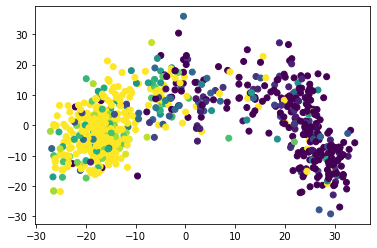

In [97]:
plt.scatter(rd.PC_1, rd.PC_2, c=psi_table.loc['gene1128'])

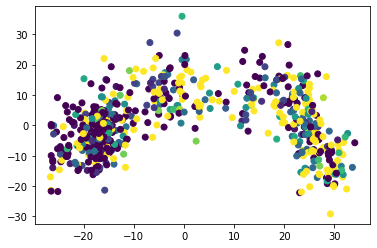

In [106]:
plt.scatter(rd.PC_1, rd.PC_2, c=psi_table.loc['gene1426'])

In [100]:
platonic_psi.loc['gene1128'].max() - platonic_psi.loc['gene1128'].min()

0.8300561863800547

In [107]:
platonic_psi.loc['gene1426'].max() - platonic_psi.loc['gene1426'].min()

0.312481289703649

In [115]:
psix_results.loc[(psix_results.qvals>= 0.2)].index & tiklova_kw.loc[(tiklova_kw.qvals<= 0.001)].index 

Index(['gene2378', 'gene1545', 'gene202', 'gene3991', 'gene2879', 'gene1423',
       'gene1045', 'gene1458', 'gene2049', 'gene332', 'gene1329', 'gene4233',
       'gene4605', 'gene2747', 'gene3515', 'gene220', 'gene3034', 'gene4529',
       'gene2741', 'gene1608', 'gene1947', 'gene825', 'gene583', 'gene3172',
       'gene4590', 'gene3011', 'gene1667', 'gene751', 'gene3794', 'gene926',
       'gene2764', 'gene2196', 'gene3489', 'gene4062', 'gene460', 'gene3275',
       'gene4136', 'gene4189', 'gene57', 'gene2763', 'gene1459', 'gene1505',
       'gene3221', 'gene3112', 'gene4322', 'gene4988', 'gene4933', 'gene2505',
       'gene959', 'gene3959', 'gene2709', 'gene4005', 'gene3737', 'gene2975',
       'gene3284', 'gene2958', 'gene3229', 'gene4342', 'gene2563', 'gene3116',
       'gene4452', 'gene3062'],
      dtype='object')

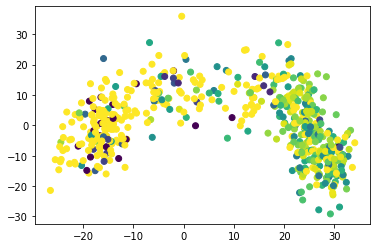

In [119]:
plt.scatter(rd.PC_1, rd.PC_2, c=psi_table.loc['gene4452'])

In [223]:
psix_results.loc['gene2505']

psix_score   -0.017740
pvals         0.720928
qvals         0.854642
Name: gene2505, dtype: float64

In [224]:
tiklova_kw.loc['gene2505']

KW_score    21.527603
pvals        0.000003
qvals        0.000014
Name: gene2505, dtype: float64

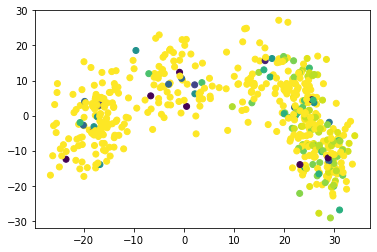

In [225]:
plt.scatter(rd.PC_1, rd.PC_2, c=psi_table.loc['gene2505'])

In [222]:
tiklova_kw.loc[neg].loc[tiklova_kw.loc[neg].qvals <= 0.01]

,KW_score,pvals,qvals
gene2505,21.527603,0.000003,0.000014
gene2533,8.666785,0.003241,0.009016
gene2563,13.292369,0.000266,0.000859
gene2709,20.083463,0.000007,0.000028
gene2741,16.848423,0.000040,0.000144
...,...,...,...
gene4671,10.024418,0.001545,0.004488
gene4711,11.422341,0.000726,0.002219
gene4745,10.706572,0.001068,0.003189
gene4933,20.152511,0.000007,0.000027


In [161]:
from scipy.stats import probplot
from scipy import stats

In [205]:
psix_probplot = probplot(-np.log10(psix_results.loc[neg].pvals), dist='norm')

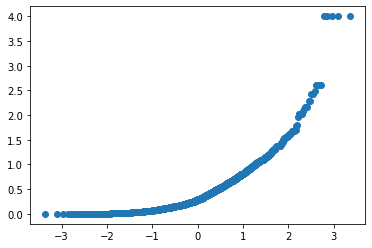

In [206]:
plt.scatter(psix_probplot[0][0], psix_probplot[0][1])

(0.0, 5.0)

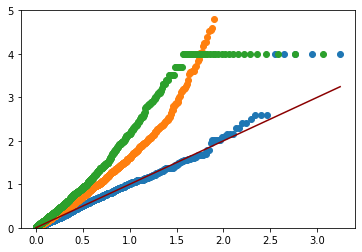

In [19]:
plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(psix_results.loc[neg].pvals)))

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(tiklova_kw.loc[neg].pvals)))

# plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(-np.log10(hs_results.loc[neg].Pval)))


plt.scatter(sorted(-np.log10(np.arange(0+(1/1149), 1+(1/1149), step = 1/1149))),
            sorted(-np.log10(gearyc.loc[gearyc.loc[gearyc.C_score > 0].index & pd.Index(neg)].pvals)))

plt.plot(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))), c='darkred')

plt.ylim((0, 5))

In [191]:
gearyc.loc[gearyc.loc[gearyc.C_score > 0].index & pd.Index(neg)]

,C_score,pvals
gene2505,0.030616,0.321339
gene2510,0.031922,0.014993
gene2513,0.031868,0.350825
gene2515,0.033919,0.412794
gene2516,0.017164,0.128436
...,...,...
gene4993,0.085988,0.004498
gene4994,0.012187,0.254373
gene4997,0.019676,0.032484
gene4998,0.011024,0.307846


(array([252.,  84.,  79.,  68.,  48.,  52.,  56.,  44.,  45.,  47.,  51.,
         36.,  41.,  37.,  46.,  45.,  26.,  31.,  37., 631.]),
 array([4.99750125e-04, 5.04747626e-02, 1.00449775e-01, 1.50424788e-01,
        2.00399800e-01, 2.50374813e-01, 3.00349825e-01, 3.50324838e-01,
        4.00299850e-01, 4.50274863e-01, 5.00249875e-01, 5.50224888e-01,
        6.00199900e-01, 6.50174913e-01, 7.00149925e-01, 7.50124938e-01,
        8.00099950e-01, 8.50074963e-01, 9.00049975e-01, 9.50024988e-01,
        1.00000000e+00]),
 <a list of 20 Patch objects>)

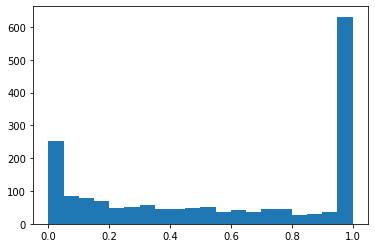

In [129]:
plt.hist(gearyc.loc[neg].pvals, bins=20)

(array([259., 120., 106.,  84.,  86.,  75.,  95.,  85.,  87.,  70.,  69.,
         60.,  64.,  83.,  65.,  76.,  55.,  69.,  65.,  83.]),
 array([1.65358777e-18, 4.99674433e-02, 9.99348865e-02, 1.49902330e-01,
        1.99869773e-01, 2.49837216e-01, 2.99804660e-01, 3.49772103e-01,
        3.99739546e-01, 4.49706989e-01, 4.99674433e-01, 5.49641876e-01,
        5.99609319e-01, 6.49576762e-01, 6.99544206e-01, 7.49511649e-01,
        7.99479092e-01, 8.49446535e-01, 8.99413979e-01, 9.49381422e-01,
        9.99348865e-01]),
 <a list of 20 Patch objects>)

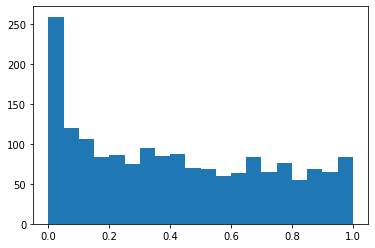

In [123]:
plt.hist(tiklova_kw.loc[neg].pvals, bins=20)

In [126]:
psix_single_lineage.adata.uns['psi'].T.to_csv('single_lineage/processed_tables/psi.tab.gz', 
                                              sep='\t', index=True, header=True)

In [15]:
gearyc = pd.read_csv('single_lineage/gearyc_output.tab.gz', sep='\t', index_col=0)

In [16]:
gearyc

,C_score,pvals
gene1,0.158189,0.000100
gene3,0.028023,0.011899
gene4,0.333843,0.000100
gene5,0.063359,0.001000
gene7,0.399201,0.000100
...,...,...
gene4994,0.012187,0.263774
gene4996,-0.003716,1.000000
gene4997,0.019676,0.032297
gene4998,0.011024,0.321568


In [17]:
from sklearn.metrics import precision_recall_curve

pre, rec, thres = precision_recall_curve(labels, psix_results.loc[order].psix_score)
pre_kw, rec_kw, thres_kw = precision_recall_curve(labels, tiklova_kw.loc[order].KW_score)
pre_c, rec_c, thres_c = precision_recall_curve(labels, gearyc.loc[order].C_score)

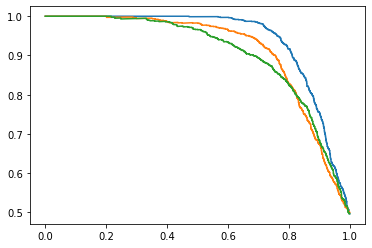

In [18]:
plt.plot(rec, pre)
plt.plot(rec_kw, pre_kw)
plt.plot(rec_c, pre_c)

In [26]:
psix_three_lineage = psix.Psix()
psix_three_lineage.process_rnaseq(
        'three_lineages/processed_tables/SE_counts_0.1.tab.gz',
        'three_lineages/processed_tables/constitutive_introns_0.1.tab.gz',
        'three_lineages/processed_tables/tpm_0.1.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

psix_three_lineage.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25, 
                                n_random_exons=2000, n_neighbors=100)


Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


100%|██████████| 1000/1000 [00:00<00:00, 8046.56it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 97.54it/s]   


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [09:06<00:00, 21.86s/it]  


Successfully estimated p-values


In [45]:
psix_three_lineage_05 = psix.Psix()
psix_three_lineage_05.process_rnaseq(
        'three_lineages/processed_tables/SE_counts_0.05.tab.gz',
        'three_lineages/processed_tables/constitutive_introns_0.05.tab.gz',
        'three_lineages/processed_tables/tpm_0.05.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

psix_three_lineage_05.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25, 
                                n_random_exons=2000, n_neighbors=100)


Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


100%|██████████| 1000/1000 [00:00<00:00, 8536.89it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3168 exons



100%|██████████| 3168/3168 [00:30<00:00, 105.51it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:35<00:00, 20.63s/it]  


Successfully estimated p-values


In [46]:
psix_three_lineage_01 = psix.Psix()
psix_three_lineage_01.process_rnaseq(
        'three_lineages/processed_tables/SE_counts_0.01.tab.gz',
        'three_lineages/processed_tables/constitutive_introns_0.01.tab.gz',
        'three_lineages/processed_tables/tpm_0.01.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

psix_three_lineage_01.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25, 
                                n_random_exons=2000, n_neighbors=100)


Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


100%|██████████| 1000/1000 [00:00<00:00, 7749.62it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 1931 exons



100%|██████████| 1931/1931 [00:16<00:00, 115.93it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:01<00:00, 19.28s/it]  


Successfully estimated p-values


In [57]:
psix_three_lineage.adata.uns['psi'].T.to_csv('three_lineages/processed_tables/psi_observed_0.1.tab.gz', 
                                              sep='\t', index=True, header=True)

psix_three_lineage_05.adata.uns['psi'].T.to_csv('three_lineages/processed_tables/psi_observed_0.05.tab.gz', 
                                              sep='\t', index=True, header=True)

psix_three_lineage_01.adata.uns['psi'].T.to_csv('three_lineages/processed_tables/psi_observed_0.01.tab.gz', 
                                              sep='\t', index=True, header=True)

In [49]:
meta = pd.read_csv('three_lineages/sim_output/meta.tab.gz', sep='\t')
meta.index=['cell_'+str(i+1) for i in range(1000)]

pop_1 = meta.loc[meta['pop'] == '4_1'].index
pop_2 = meta.loc[meta['pop'] == '4_5'].index
pop_3 = meta.loc[meta['pop'] == '5_2'].index
pop_4 = meta.loc[meta['pop'] == '5_3'].index
labels = [pop_1, pop_2, pop_3, pop_4]

three_kw_1 = run_kw_dset(psix_three_lineage.adata.uns['psi'][psix_three_lineage.psix_results.index].T, 
                         labels, psix_three_lineage.psix_results.index)

three_kw_05 = run_kw_dset(psix_three_lineage_05.adata.uns['psi'][psix_three_lineage_05.psix_results.index].T, 
                         labels, psix_three_lineage_05.psix_results.index)

three_kw_01 = run_kw_dset(psix_three_lineage_01.adata.uns['psi'][psix_three_lineage_01.psix_results.index].T, 
                         labels, psix_three_lineage_01.psix_results.index)

100%|██████████| 1931/1931 [00:13<00:00, 138.14it/s]


In [58]:
l1 = []
with open('three_lineages/sim_output/l1_diff.txt', 'r') as l1_file:
    for i in l1_file:
        l1.append(int(i.rstrip()))
        
l2 = []
with open('three_lineages/sim_output/l2_diff.txt', 'r') as l2_file:
    for i in l2_file:
        l2.append(int(i.rstrip()))
        
l3 = []
with open('three_lineages/sim_output/l3_diff.txt', 'r') as l3_file:
    for i in l3_file:
        l3.append(int(i.rstrip()))
        
l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)

ds = ((l1 + l2 + l3)>0).astype(int)

gearyc_3l_1 = pd.read_csv('three_lineages/gearyc_0.1.tab.gz', sep='\t', index_col=0)
gearyc_3l_05 = pd.read_csv('three_lineages/gearyc_0.05.tab.gz', sep='\t', index_col=0)
gearyc_3l_01 = pd.read_csv('three_lineages/gearyc_0.01.tab.gz', sep='\t', index_col=0)

100%|██████████| 200/200 [00:01<00:00, 123.98it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

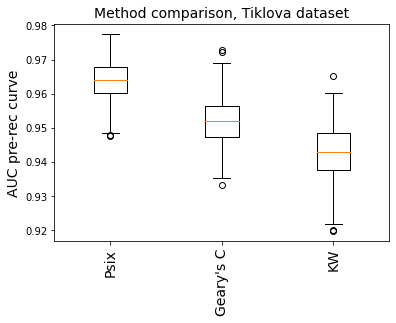

In [73]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

psix_results_1 = psix_three_lineage.psix_results

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_results_1.index

pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results_1.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))


platonic_psi = pd.read_csv('three_lineages/sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)

psix_auc_1 = []
kw_auc_1 = []
gearyc_3l_auc_1 = []
    
for i in tqdm(range(200)):
    
    pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
    neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)
    
    labels = [1]*len(pos_sample) + [0]*len(neg_sample)
    order = list(pos_sample) + list(neg_sample)

    
    y_ = labels#list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


    pre, rec, thres = precision_recall_curve(y_, psix_results_1.loc[order].psix_score)
    pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, three_kw_1.loc[order].KW_score)
    pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_3l_1.loc[order].C_score)

    psix_auc_1.append(auc(rec, pre))
    kw_auc_1.append(auc(rec_kw, pre_kw))
    gearyc_3l_auc_1.append(auc(rec_c, pre_c))
    

    
boxplots = [ psix_auc_1, gearyc_3l_auc_1, kw_auc_1]



bp = plt.boxplot(boxplots)


plt.xticks(np.arange(1, 4), 
           ['Psix', "Geary's C", 'KW'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

100%|██████████| 200/200 [00:01<00:00, 102.89it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

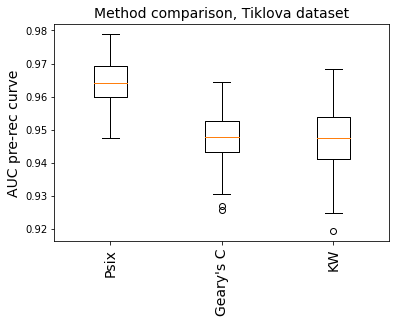

In [74]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

psix_results_05 = psix_three_lineage_05.psix_results

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_results_05.index

pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results_05.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))


platonic_psi = pd.read_csv('three_lineages/sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)

psix_auc_05 = []
kw_auc_05 = []
gearyc_3l_auc_05 = []
    
for i in tqdm(range(200)):
    
    pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
    neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)
    
    labels = [1]*len(pos_sample) + [0]*len(neg_sample)
    order = list(pos_sample) + list(neg_sample)

    
    y_ = labels#list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


    pre, rec, thres = precision_recall_curve(y_, psix_results_05.loc[order].psix_score)
    pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, three_kw_05.loc[order].KW_score)
    pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_3l_05.loc[order].C_score)

    psix_auc_05.append(auc(rec, pre))
    kw_auc_05.append(auc(rec_kw, pre_kw))
    gearyc_3l_auc_05.append(auc(rec_c, pre_c))
    

    
boxplots = [ psix_auc_05, gearyc_3l_auc_05, kw_auc_05]



bp = plt.boxplot(boxplots)


plt.xticks(np.arange(1, 4), 
           ['Psix', "Geary's C", 'KW'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

100%|██████████| 200/200 [00:01<00:00, 152.42it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

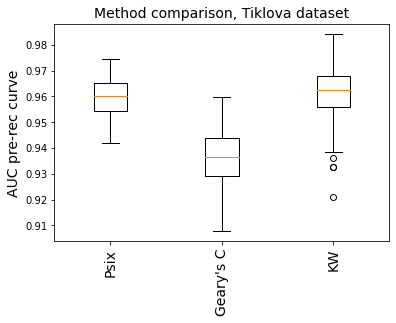

In [75]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

psix_results_01 = psix_three_lineage_01.psix_results

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_results_01.index

pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results_01.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))


platonic_psi = pd.read_csv('three_lineages/sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)

psix_auc_01 = []
kw_auc_01 = []
gearyc_3l_auc_01 = []
    
for i in tqdm(range(200)):
    
    pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
    neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)
    
    labels = [1]*len(pos_sample) + [0]*len(neg_sample)
    order = list(pos_sample) + list(neg_sample)

    
    y_ = labels#list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


    pre, rec, thres = precision_recall_curve(y_, psix_results_01.loc[order].psix_score)
    pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, three_kw_01.loc[order].KW_score)
    pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_3l_01.loc[order].C_score)

    psix_auc_01.append(auc(rec, pre))
    kw_auc_01.append(auc(rec_kw, pre_kw))
    gearyc_3l_auc_01.append(auc(rec_c, pre_c))
    

    
boxplots = [ psix_auc_01, gearyc_3l_auc_01, kw_auc_01]



bp = plt.boxplot(boxplots)


plt.xticks(np.arange(1, 4), 
           ['Psix', "Geary's C", 'KW'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

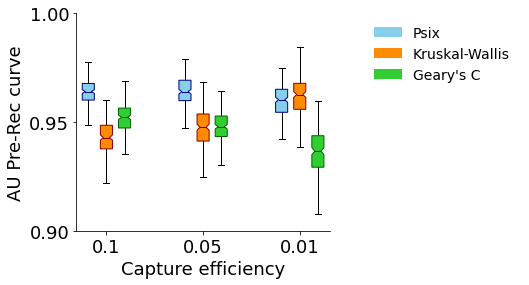

In [77]:
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,7)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_auc_1, psix_auc_05, psix_auc_01], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_auc_1, kw_auc_05, kw_auc_01], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_3l_auc_1, gearyc_3l_auc_05, gearyc_3l_auc_01], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=18)
ax.set_xlabel('Capture efficiency', size=18)

ax.set_yticks([0.9, 0.95, 1])
ax.set_yticklabels(['0.90', '0.95', '1.00'], size=18)
ax.set_ylabel('AU Pre-Rec curve', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.set_xlim([0, 0])

ax_2.hist([-1, -1], color='skyblue', label='Psix')
ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

ax_2.spines["bottom"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)

ax_2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,  
    right=False,
    left=False, # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)

ax_2.legend(frameon=False, fontsize=14)

In [67]:
psix_results_1

,psix_score,pvals,qvals
gene147,1.774973,0.000500,0.001168
gene2931,1.742764,0.000500,0.001168
gene1784,1.660103,0.000500,0.001168
gene3744,1.602137,0.000500,0.001168
gene766,1.442272,0.000500,0.001168
...,...,...,...
gene3798,-0.083172,0.994003,0.999517
gene2665,-0.085449,0.997501,1.000000
gene1196,-0.087882,1.000000,1.000000
gene172,-0.088624,1.000000,1.000000


In [68]:
psix_results_01

,psix_score,pvals,qvals
gene1784,1.699468,0.000500,0.001268
gene3744,1.679031,0.000500,0.001268
gene3635,1.626407,0.000500,0.001268
gene3750,1.562382,0.000500,0.001268
gene1114,1.549694,0.000500,0.001268
...,...,...,...
gene2713,-0.071349,0.990005,0.996633
gene4006,-0.073699,0.989005,0.996228
gene2391,-0.076907,0.991004,0.996633
gene2124,-0.080234,1.000000,1.000000


(array([2542.,  267.,  312.,  303.,  294.,  326.,  277.,  267.,  248.,
         164.]),
 array([0.        , 0.09758673, 0.19517347, 0.2927602 , 0.39034694,
        0.48793367, 0.5855204 , 0.68310714, 0.78069387, 0.87828061,
        0.97586734]),
 <a list of 10 Patch objects>)

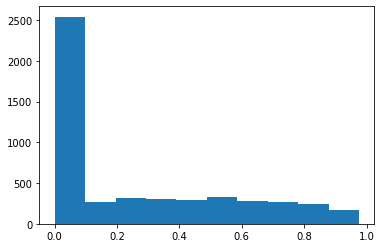

In [35]:
from scipy.special import expit, logit
plt.hist(expit(platonic_psi.max(axis=1)) - expit(platonic_psi.min(axis=1)))

In [36]:
np.median((expit(platonic_psi.max(axis=1)) - expit(platonic_psi.min(axis=1))).loc[ds==1])

0.4361128854837302

In [38]:
psix_results = psix_three_lineage.psix_results

In [39]:
platonic_psi = pd.read_csv('three_lineages/sim_output/psi_platonic.tab.gz', sep='\t', 
                           names = ['cell_'+str(i+1) for i in range(2000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

In [40]:
y = []
order = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results.index:
        
        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.000001:
            y.append(1)   
        else:
            y.append(0)
        order.append('gene'+str(i+1))

In [41]:
y = []
order = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results.index:
        
        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)   
            order.append('gene'+str(i+1))
        elif ds[i] == 0:
            y.append(0)
            order.append('gene'+str(i+1))

In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

pre, rec, thres = precision_recall_curve(y, psix_results.loc[order].psix_score)
pre_kw, rec_kw, thres_kw = precision_recall_curve(y, three_kw.loc[order].KW_score)
pre_c, rec_c, thres_c = precision_recall_curve(y, gearyc_3l.loc[order].C_score)

In [43]:
print(auc(rec, pre))
print(auc(rec_kw, pre_kw))
print(auc(rec_c, pre_c))

0.9665869965618226
0.961678591636479
0.9476049743470921


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score

weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.05)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.01) | (weyn_fdr.min(axis=1) > 0.05)]

exons = tiklova_psix.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
gearyc_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(200)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_gearyc.index) + [0]*len(pd.Index(neg_choice) & tiklova_gearyc.index)
    c_y = list((tiklova_gearyc.loc[pd.Index(pos_choice) & tiklova_gearyc.index].qvals <= 0.05).astype(int)) + list((tiklova_gearyc.loc[pd.Index(neg_choice) & tiklova_gearyc.index].qvals <= 0.05).astype(int))
    f1 = f1_score(y, c_y)
    gearyc_auc.append(f1)

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list((tiklova_psix.loc[pos_choice].qvals <= 0.05).astype(int)) + list((tiklova_psix.loc[neg_choice].qvals <= 0.05).astype(int))
    psix_auc.append(f1_score(y, psix_y))
    

    kw_y = list((tiklova_kw.loc[pos_choice].qvals <= 0.05).astype(int)) + list((tiklova_kw.loc[neg_choice].qvals <= 0.05).astype(int))
    kw_auc.append(f1_score(y, kw_y))
    

    r_y = list((tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]<=0.05).astype(int)) + list((tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]]<=0.05).astype(int))
    brie_l_auc.append(f1_score([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y))
    #####




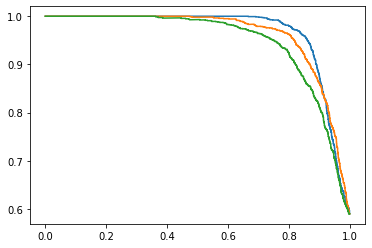

In [44]:
plt.plot(rec, pre)
plt.plot(rec_kw, pre_kw)
plt.plot(rec_c, pre_c)

In [61]:
y = []
order = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results.index:
        
        if ds[i] == 0:
            y.append(0)
            order.append('gene'+str(i+1))

(array([114., 157., 142., 120., 133., 159., 139., 154., 126., 145.]),
 array([4.99750125e-04, 1.00449775e-01, 2.00399800e-01, 3.00349825e-01,
        4.00299850e-01, 5.00249875e-01, 6.00199900e-01, 7.00149925e-01,
        8.00099950e-01, 9.00049975e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

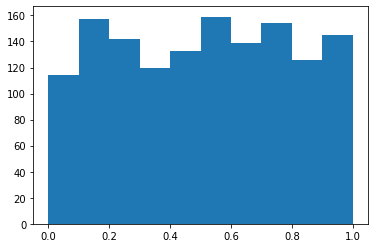

In [62]:
plt.hist(psix_results.loc[order].pvals)

(array([367., 163., 140., 116., 109., 111., 113.,  97.,  87.,  86.]),
 array([1.73826051e-11, 9.94783852e-02, 1.98956770e-01, 2.98435155e-01,
        3.97913541e-01, 4.97391926e-01, 5.96870311e-01, 6.96348696e-01,
        7.95827081e-01, 8.95305466e-01, 9.94783851e-01]),
 <a list of 10 Patch objects>)

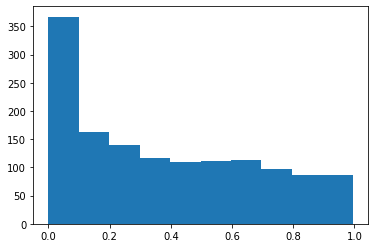

In [18]:
plt.hist(three_kw.loc[order].pvals)

In [145]:
from scipy.special import expit, logit
platonic_psi = expit(platonic_psi.loc[order])

In [149]:
(platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2

gene1       False
gene2        True
gene3       False
gene4       False
gene7        True
            ...  
gene4995     True
gene4996    False
gene4997    False
gene4998    False
gene5000     True
Length: 3316, dtype: bool

In [3]:
psix_single_lineage = psix.Psix()
psix_single_lineage.process_rnaseq(
        'single_lineage/processed_tables/SE_counts_0.1.tab.gz',
        'single_lineage/processed_tables/constitutive_introns_0.1.tab.gz',
        'single_lineage/processed_tables/tpm_0.1.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

psix_single_lineage.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100, 
                                        turbo='/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix_turbo/')


Obtaining psi tables...
Reading TPM and transforming to mRNA counts...


 40%|████      | 8/20 [00:00<00:00, 76.60it/s]

Successfully processed RNA-seq data


  0%|          | 0/1000 [00:00<?, ?it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 1688.00it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:06<00:00, 506.39it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [00:24<00:00,  1.04it/s]


Successfully estimated p-values


In [5]:
psix_k100 = psix_single_lineage.psix_results

NameError: name 'psix_single_lineage' is not defined

In [5]:
psix_single_lineage.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=50, 
                                        turbo='/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix_turbo/')

psix_k50 = psix_single_lineage.psix_results

100%|██████████| 1000/1000 [00:00<00:00, 10515.76it/s]

cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:11<00:00, 310.78it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [00:23<00:00,  1.05it/s]


Successfully estimated p-values


In [9]:
psix_single_lineage.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=150, 
                                        turbo='/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix_turbo/')

psix_k150 = psix_single_lineage.psix_results

psix_single_lineage.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=200, 
                                        turbo='/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix_turbo/')

psix_k200 = psix_single_lineage.psix_results

 86%|████████▋ | 865/1000 [00:00<00:00, 4311.89it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 4309.09it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:11<00:00, 312.45it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 30%|███       | 6/20 [00:00<00:00, 57.90it/s]

Successfully estimated p-values


 68%|██████▊   | 682/1000 [00:00<00:00, 3413.88it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 3385.06it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:11<00:00, 293.38it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [00:24<00:00,  1.03it/s]


Successfully estimated p-values


In [7]:
psix_k100

,psix_score,pvals,qvals
gene2332,1.658747,0.000500,0.001711
gene1880,1.606291,0.000500,0.001711
gene1128,1.563131,0.000500,0.001711
gene705,1.336154,0.000500,0.001711
gene1878,1.323595,0.000500,0.001711
...,...,...,...
gene3293,-0.088347,1.000000,1.000000
gene2851,-0.088690,0.996002,1.000000
gene3013,-0.091404,0.996002,1.000000
gene2372,-0.092600,1.000000,1.000000


In [26]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

In [30]:
labels = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

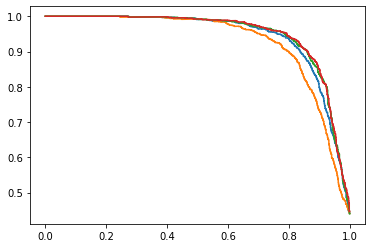

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


pre, rec, thres = precision_recall_curve(labels, psix_k100.loc[order].psix_score)
pre_kw, rec_kw, thres_kw = precision_recall_curve(labels, psix_k50.loc[order].psix_score)
pre_h, rec_h, thres_h = precision_recall_curve(labels, psix_k150.loc[order].psix_score)
pre_h1, rec_h1, thres_h = precision_recall_curve(labels, psix_k200.loc[order].psix_score)


plt.plot(rec, pre)
plt.plot(rec_kw, pre_kw)
plt.plot(rec_h, pre_h)
plt.plot(rec_h1, pre_h1)

In [21]:
psix_k100.loc[order]

,psix_score,pvals,qvals
gene1,0.200995,0.000500,0.001711
gene3,0.050681,0.018991,0.051760
gene4,0.500352,0.000500,0.001711
gene5,0.029862,0.009995,0.029108
gene7,0.683224,0.000500,0.001711
...,...,...,...
gene4994,0.003941,0.123938,0.255171
gene4996,-0.009851,0.347826,0.549647
gene4997,-0.020545,0.938531,0.971990
gene4998,-0.011025,0.555222,0.751945


In [20]:
pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results.index:
        
        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        elif ds[i] == 0:
            neg.append('gene'+str(i+1))


In [75]:
psix_results[:600]

,psix_score,pvals,qvals
gene147,1.774973,0.0005,0.001168
gene2931,1.742764,0.0005,0.001168
gene1784,1.660103,0.0005,0.001168
gene3744,1.602137,0.0005,0.001168
gene766,1.442272,0.0005,0.001168
...,...,...,...
gene3743,0.322463,0.0005,0.001168
gene4667,0.322397,0.0005,0.001168
gene860,0.322396,0.0005,0.001168
gene4837,0.321815,0.0005,0.001168


In [42]:
three_kw.loc[np.array(neg)[(three_kw.loc[neg].qvals <= 0.001)]].sort_values('KW_score')

,KW_score,pvals,qvals
gene4508,12.820931,5.040299e-03,9.947730e-03
gene2511,12.824053,5.032972e-03,9.938965e-03
gene2951,12.824532,5.031847e-03,9.938965e-03
gene568,12.833118,5.011754e-03,9.908427e-03
gene3112,12.889350,4.882107e-03,9.663205e-03
...,...,...,...
gene3426,38.451337,2.268182e-08,6.822374e-08
gene530,41.213729,5.891039e-09,1.826169e-08
gene546,41.486394,5.156447e-09,1.607132e-08
gene1895,51.843343,3.234408e-11,1.153137e-10


In [88]:
psix_results.loc[neg].sort_values('psix_score')

,psix_score,pvals,qvals
gene172,-0.088624,1.000000,1.000000
gene1196,-0.087882,1.000000,1.000000
gene2665,-0.085449,0.997501,1.000000
gene3798,-0.083172,0.994003,0.999517
gene1883,-0.083165,0.994003,0.999517
...,...,...,...
gene379,0.060003,0.000500,0.001168
gene1972,0.062341,0.010495,0.023319
gene4699,0.068393,0.001499,0.003472
gene2635,0.072079,0.000500,0.001168


In [92]:
three_kw.loc['gene2887']

KW_score    3.744060
pvals       0.290460
qvals       0.385212
Name: gene2887, dtype: float64

Text(0.5, 1.0, 'Positive exon')

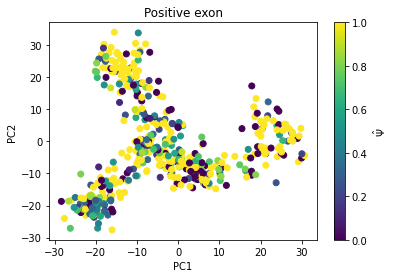

In [90]:
rd = pd.read_csv('three_lineages/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)
sc = plt.scatter(rd.PC_1, rd.PC_2, c=psix_three_lineage.adata.uns['psi'][psix_three_lineage_pc2.psix_results.index]['gene2635'])

plt.colorbar(label='$\hat{\Psi}$')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Positive exon')

Text(0.5, 1.0, 'Positive exon')

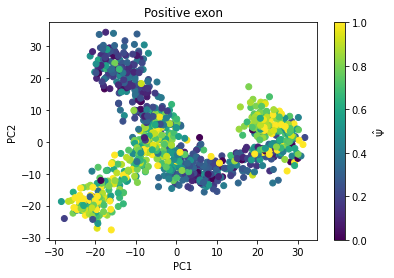

In [77]:
rd = pd.read_csv('three_lineages/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)
sc = plt.scatter(rd.PC_1, rd.PC_2, c=psix_three_lineage.adata.uns['psi'][psix_three_lineage_pc2.psix_results.index]['gene2668'])

plt.colorbar(label='$\hat{\Psi}$')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Positive exon')

Text(0.5, 1.0, 'Positive exon')

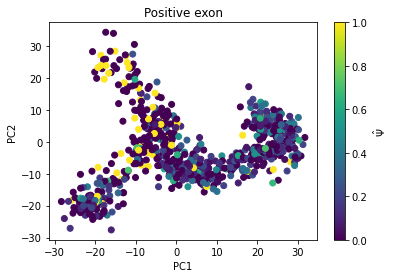

In [70]:
rd = pd.read_csv('three_lineages/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)
sc = plt.scatter(rd.PC_1, rd.PC_2, c=psix_three_lineage.adata.uns['psi'][psix_three_lineage_pc2.psix_results.index]['gene4508'])

plt.colorbar(label='$\hat{\Psi}$')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Positive exon')

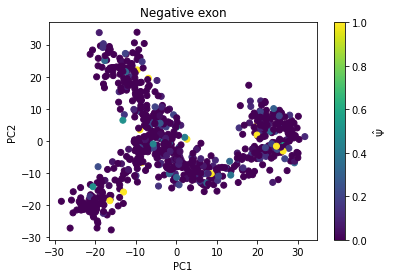

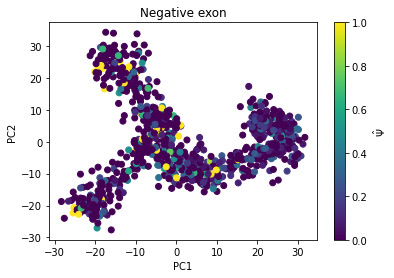

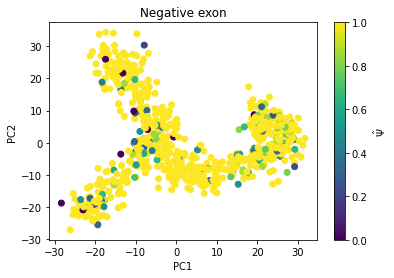

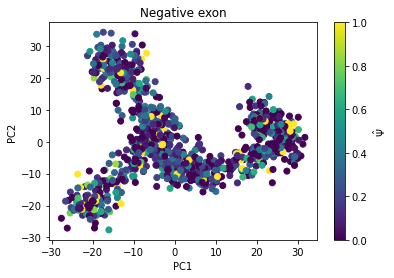

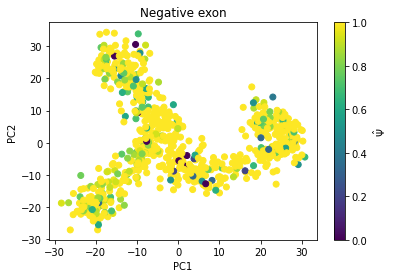

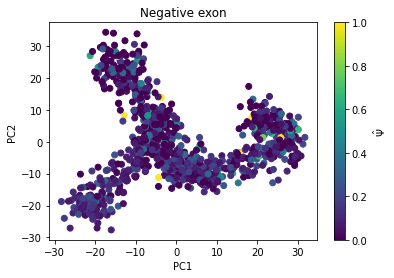

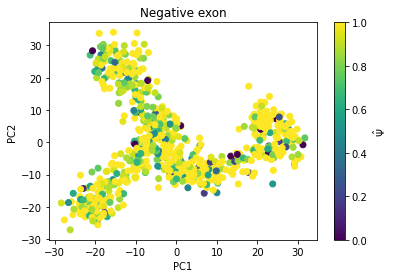

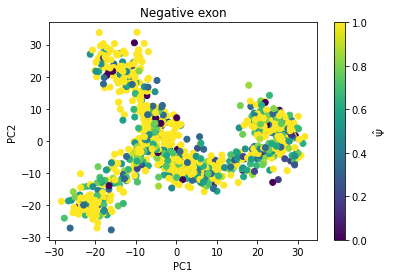

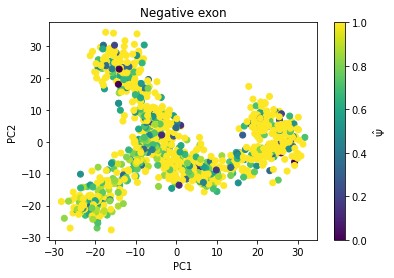

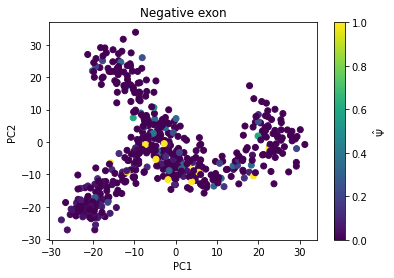

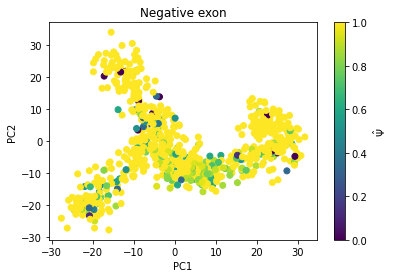

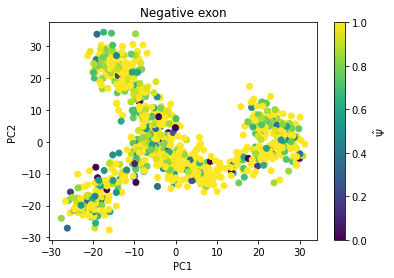

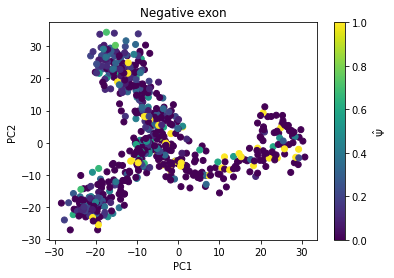

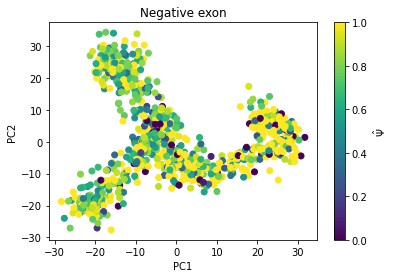

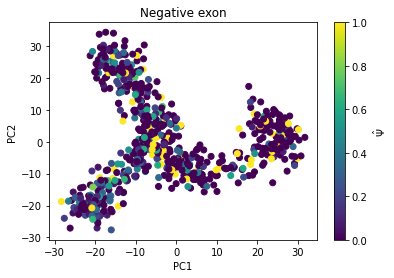

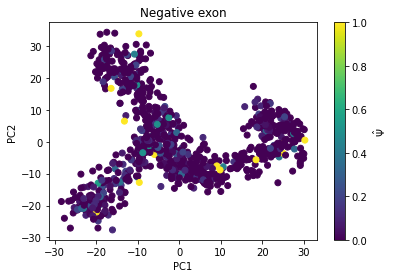

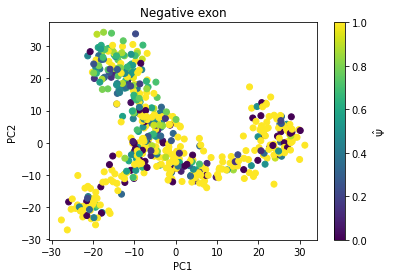

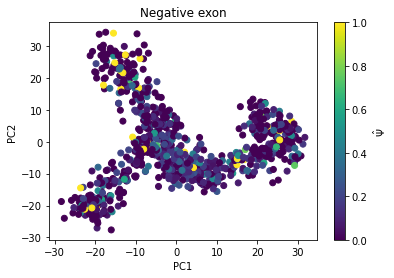

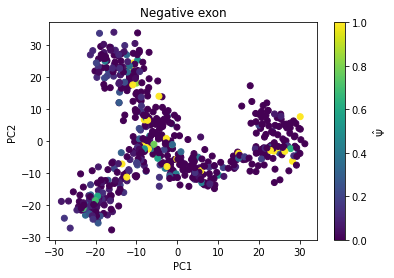

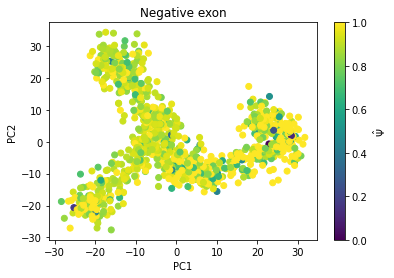

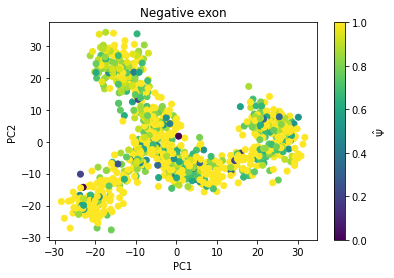

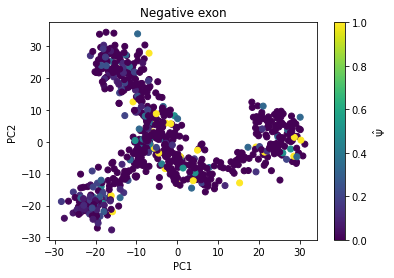

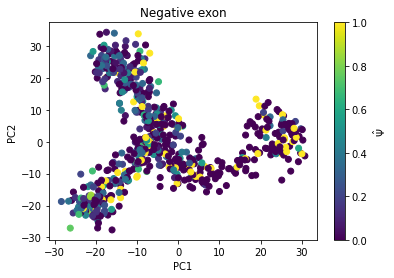

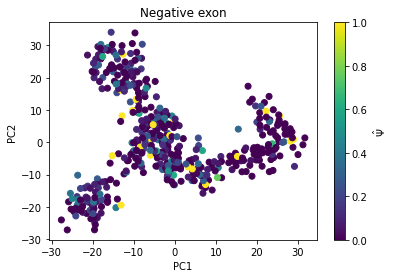

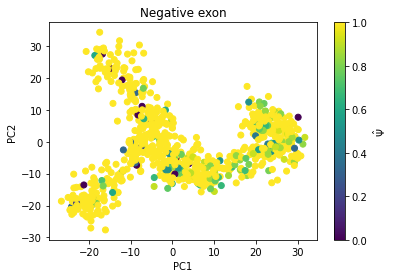

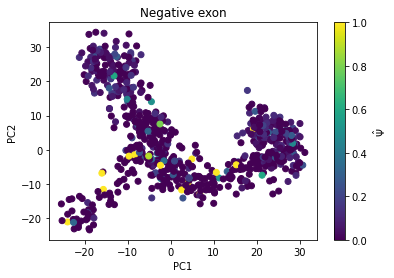

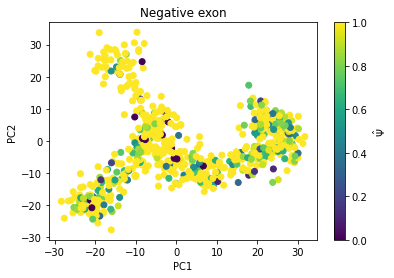

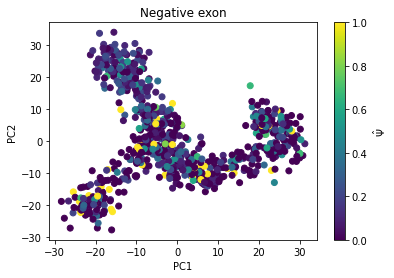

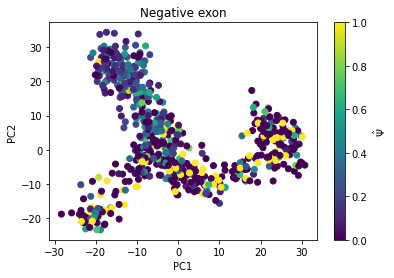

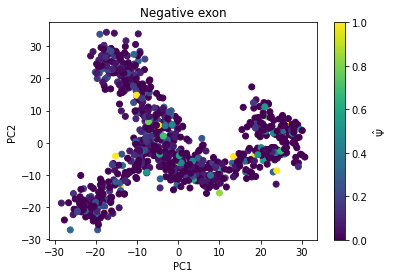

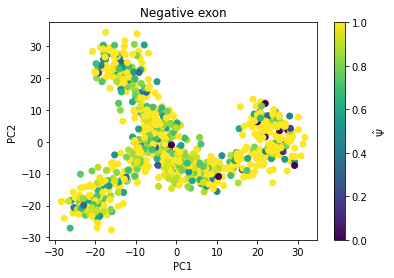

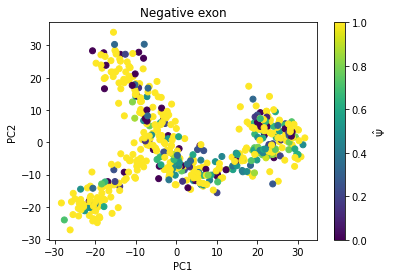

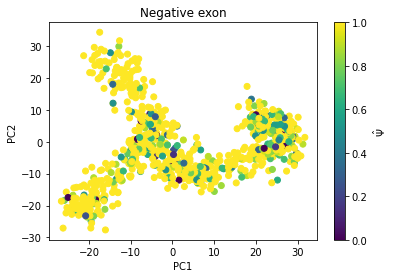

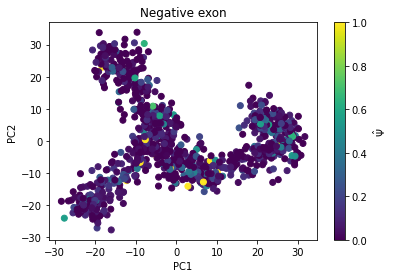

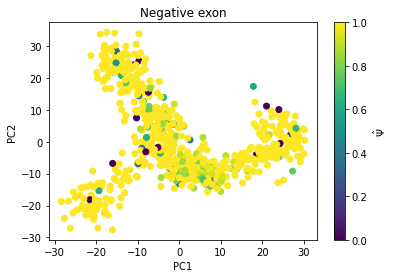

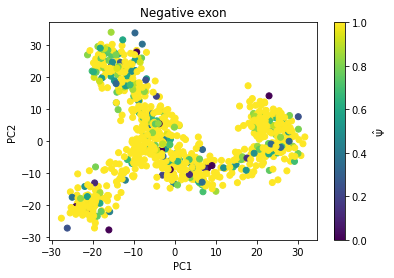

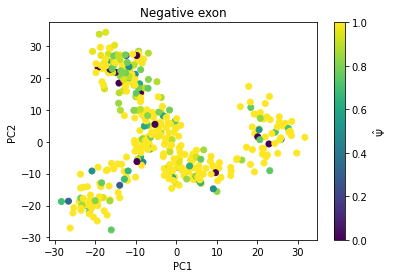

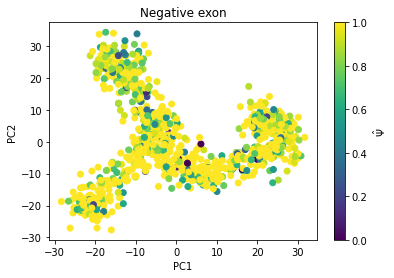

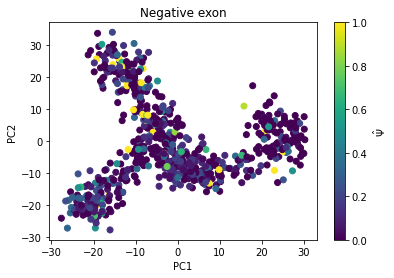

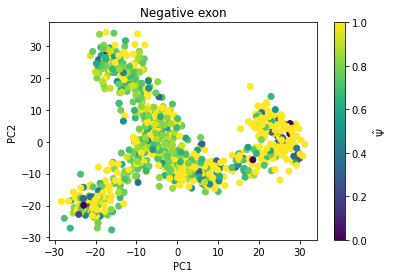

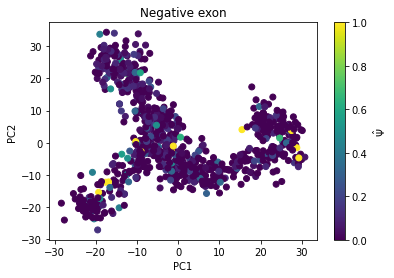

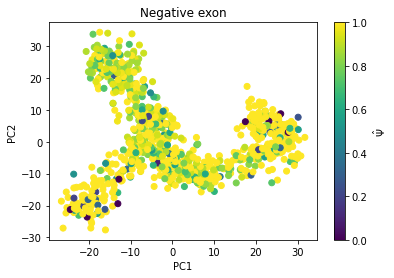

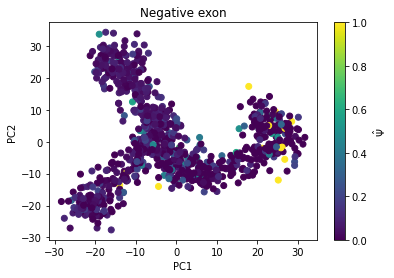

In [47]:
rd = pd.read_csv('three_lineages/processed_tables/pc3_rd.tab.gz', sep='\t', index_col=0)

for exon in three_kw.loc[np.array(neg)[(three_kw.loc[neg].qvals <= 0.001)]].sort_values('KW_score').index:
    sc = plt.scatter(rd.PC_1, rd.PC_2, c=psix_three_lineage.adata.uns['psi'][psix_three_lineage.psix_results.index][exon])

    plt.colorbar(label='$\hat{\Psi}$')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Negative exon')
    plt.show()

In [144]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score

kw_auc = []
psix_auc = []
gearyc_auc = []


pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results.index:
        
        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        elif ds[i] == 0:
            neg.append('gene'+str(i+1))

            

for sample in tqdm(range(200)):
    
    y = []
    order = []
    
    pos_choice = np.random.choice(pos, 200, replace=False)
    neg_choice = np.random.choice(neg, 200, replace=False)
    
   
    y = [1]*len(pd.Index(pos_choice) & gearyc_3l.index) + [0]*len(pd.Index(neg_choice) & gearyc_3l.index)
    c_y = list((gearyc_3l.loc[pd.Index(pos_choice) & gearyc_3l.index].pvals <= 0.05).astype(int)) + list((gearyc_3l.loc[pd.Index(neg_choice) & gearyc_3l.index].pvals <= 0.05).astype(int))
    f1 = f1_score(y, c_y)
    gearyc_auc.append(f1)

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list((psix_results.loc[pos_choice].pvals <= 0.05).astype(int)) + list((psix_results.loc[neg_choice].pvals <= 0.05).astype(int))
    psix_auc.append(f1_score(y, psix_y))
    

    kw_y = list((three_kw.loc[pos_choice].pvals <= 0.05).astype(int)) + list((three_kw.loc[neg_choice].pvals <= 0.05).astype(int))
    kw_auc.append(f1_score(y, kw_y))
    


100%|██████████| 200/200 [00:03<00:00, 63.83it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

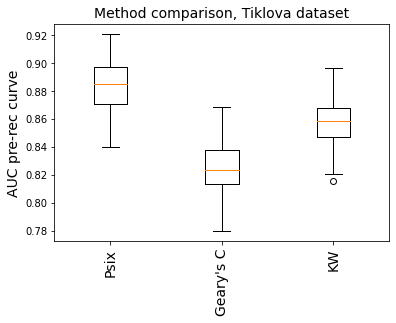

In [145]:
tiklova_boxplots = [ psix_auc, gearyc_auc, kw_auc]



bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 4), 
           ['Psix', "Geary's C", 'KW'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

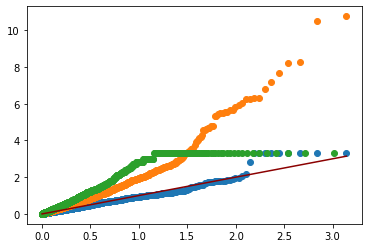

In [95]:
plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(psix_results.loc[neg].pvals)))

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(three_kw.loc[neg].pvals)))

# plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
#             sorted(-np.log10(hs_results.loc[neg].Pval)))


plt.scatter(sorted(-np.log10(np.arange(0+(1/len(gearyc_3l.loc[gearyc_3l.C_score > 0].index & pd.Index(neg))), 
                                       1+(1/len(gearyc_3l.loc[gearyc_3l.C_score > 0].index & pd.Index(neg))), 
                                       step = 1/len(gearyc_3l.loc[gearyc_3l.C_score > 0].index & pd.Index(neg))))),
            sorted(-np.log10(gearyc_3l.loc[gearyc_3l.loc[gearyc_3l.C_score > 0].index & pd.Index(neg)].pvals)))

plt.plot(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))), c='darkred')

# plt.ylim((0, 5))

In [80]:
len(gearyc_3l.loc[gearyc_3l.C_score > 0].index & pd.Index(neg))

1045

In [81]:
len(neg)

1389

In [5]:
# import os
# psix_single_lineage_1 = psix.Psix()
# psix_single_lineage_1.process_rnaseq(
#         'single_lineage/processed_tables/SE_counts_0.1.tab.gz',
#         'single_lineage/processed_tables/constitutive_introns_0.1.tab.gz',
#         'single_lineage/processed_tables/tpm_0.1.tab.gz',
#         minJR = 1,
#         minCell=1,
#         min_observed = 0.25)

# os.mkdir('k_sensitivity/')


psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=5)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_5.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=10)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_10.tab.gz', sep='\t', index=True, header=True)


psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=20)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_20.tab.gz', sep='\t', index=True, header=True)


psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=30)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_30.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=50)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_50.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_100.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=150)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_150.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=200)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_200.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=250)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_250.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=300)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_300.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=400)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_400.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=500)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_500.tab.gz', sep='\t', index=True, header=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 4194.00it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 100.75it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 36508.40it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:35<00:00, 98.45it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 23270.40it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:36<00:00, 94.26it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 21618.12it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:37<00:00, 93.64it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 15208.44it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:36<00:00, 95.34it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 86%|████████▋ | 863/1000 [00:00<00:00, 8625.73it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 8527.04it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:36<00:00, 94.54it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 49%|████▉     | 491/1000 [00:00<00:00, 4905.76it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 4834.03it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:35<00:00, 97.33it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 36%|███▋      | 365/1000 [00:00<00:00, 3645.37it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 3691.98it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 100.01it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 31%|███       | 309/1000 [00:00<00:00, 3082.16it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 3050.30it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 100.05it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 26%|██▌       | 255/1000 [00:00<00:00, 2545.71it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 2540.46it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:36<00:00, 96.47it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 20%|█▉        | 195/1000 [00:00<00:00, 1947.29it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 1910.91it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:35<00:00, 97.41it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 18%|█▊        | 185/1000 [00:00<00:00, 1848.73it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 1831.88it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:36<00:00, 95.08it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:22<00:00, 20.12s/it]  


Successfully estimated p-values


In [12]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [13]:
psix_5 = pd.read_csv('k_sensitivity/k_5.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('k_sensitivity/k_10.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('k_sensitivity/k_20.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('k_sensitivity/k_30.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('k_sensitivity/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('k_sensitivity/k_100.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('k_sensitivity/k_150.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('k_sensitivity/k_200.tab.gz', sep='\t', index_col=0)
psix_300 = pd.read_csv('k_sensitivity/k_300.tab.gz', sep='\t', index_col=0)
psix_400 = pd.read_csv('k_sensitivity/k_400.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('k_sensitivity/k_500.tab.gz', sep='\t', index_col=0)

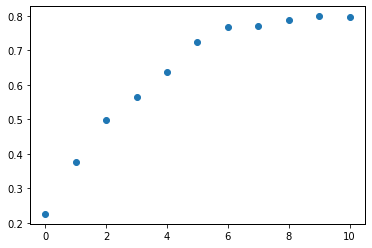

In [14]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_5.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_5.index
y = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

recall_list = [recall_score(y, x.loc[order].qvals <= 0.05) for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, 
                                                                psix_150, psix_200, psix_300, psix_400, psix_500]]
plt.scatter(range(len(recall_list)), recall_list)

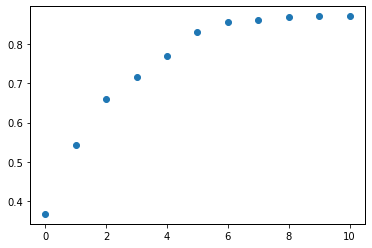

In [15]:
f1_list = [f1_score(y, x.loc[order].qvals <= 0.05) for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, 
                                                                psix_150, psix_200, psix_300, psix_400, psix_500]]
plt.scatter(range(len(f1_list)), f1_list)

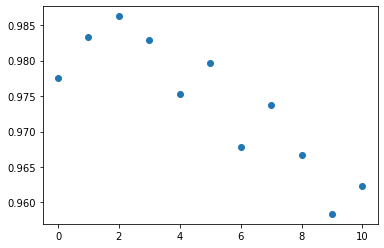

In [27]:
precision_list = [precision_score(y, x.loc[order].qvals <= 0.05) for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, 
                                                                psix_150, psix_200, psix_300, psix_400, psix_500]]
plt.scatter(range(len(precision_list)), precision_list)

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import subprocess as sp
from scipy.stats.mstats import zscore

from scipy.stats import pearsonr, spearmanr

def enrichment_score(signal, exon_score=1):
    Nr = np.sum(signal)
    #exon_score = [1]*len(signal)
    denominator = len(signal) - np.sum(np.array(signal)>0)
    
    p_hit = []
    p_miss = []
    current_p_hit = 0
    current_p_miss = 0
    for i in range(len(signal)):
        if signal[i] > 0:
            current_p_hit += signal[i]/Nr
        else:
            current_p_miss += 1/denominator
        
        p_hit.append(current_p_hit)
        p_miss.append(current_p_miss)
        
    p_hit = np.array(p_hit)
    p_miss = np.array(p_miss)
    return p_hit-p_miss
    
def gsea(signal, permutations=2000):
    ES = np.max(enrichment_score(signal))
    ES_random = []
    for i in tqdm(range(permutations)):
        random_signal = np.random.choice(signal, len(signal), replace=False)
        ES_random.append(np.max(enrichment_score(random_signal)))
        
    ES_random = np.array(ES_random)
    p_val = (np.sum(ES_random >= ES)+1)/(permutations+1)
    return ES, p_val

def hyper_test(M, n, N, k):
    '''
    Calculates the hypergeometric test.
    
    Input:
      M: Population size (total exons tested)
      n: Successess in population (exons with p-value <= x)
      N: Sample size (exons selected)
      k: Successes in sample (selected exons with p-value <= x)
    Output:
      p_depleted: p-value of depletion from the hypergeometric test
      p_enriched: p-value of enrichment from the hypergeometric test
    '''
    hpd = hypergeom(M, n, N) # Hypergeometric distribution
    p_depleted = hpd.cdf(k)  # Get cummulative distribution up to k
    p_enriched = hpd.sf(k-1) # Survival function up to k-1 (1 - cdf(k-1))
    return p_depleted, p_enriched


def test_enrichment(binding, exon_cluster):
    M = len(binding)
    n = binding.sum()
    N = len(exon_cluster)
    k = binding.loc[exon_cluster].sum()
    p_depleted, p_enriched = hyper_test(M, n, N, k)
    
    enrichment = (k/N)/(n/M)
    
    if enrichment == 0:
        log_enrich = -3
    else:
        log_enrich = np.log2(enrichment)
        
    
    return p_enriched, p_depleted, log_enrich

from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

def get_background(counts, manifold, n_neighbors=100, remove_self=True):
    
    gene_list = counts.index
    
    n_genes = len(gene_list)
    n_cells = len(psi.index)
    
    knn_neighbors = NearestNeighbors(n_neighbors=n_neighbors).fit(manifold)
    distances, indices = knn_neighbors.kneighbors(manifold)
    
    if remove_self:
        distances = distances[:,1:]
        indices = indices[:,1:]

    sigma_array = np.max(distances, axis=1)
    
    weights = np.exp(-(distances**2)/(sigma_array**2).reshape(len(counts.columns),1))
    
    smooth_gene = pd.DataFrame()
    
    print('slicing exons...')
    pandas_slices = []
    for idx in indices:
        pandas_slices.append(counts.loc[gene_list].T.iloc[idx].to_numpy())

    pandas_slices = np.array(pandas_slices)

    for i in tqdm(range(len(gene_list)), position=0, leave=True):
        gene = gene_list[i]

        
        neighbors_gene = pandas_slices[:,:,i]
        

        background = np.nansum(neighbors_gene*weights, axis=1)/((~np.isnan(np.array(neighbors_gene)))*weights).sum(axis=1)


        smooth_gene[gene] = background

    smooth_gene.index = counts.columns
    
    return smooth_gene
    


In [14]:
gsea([int(x in pos) for x in psix_5.index])

100%|██████████| 2000/2000 [00:09<00:00, 217.49it/s]


(0.2969722306345268, 0.0004997501249375312)

In [15]:
gsea([int(x in pos) for x in psix_100.index])

100%|██████████| 2000/2000 [00:08<00:00, 224.46it/s]


(0.7317227803600141, 0.0004997501249375312)

In [27]:
np.max(enrichment_score([int(x in pos) for x in psix_5.index]))

0.2969722306345268

In [28]:
import os
psix_single_lineage_1 = psix.Psix()
psix_single_lineage_1.process_rnaseq(
        'single_lineage/processed_tables/SE_counts_0.01.tab.gz',
        'single_lineage/processed_tables/constitutive_introns_0.01.tab.gz',
        'single_lineage/processed_tables/tpm_0.01.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

os.mkdir('k_sensitivity_0.01/')


psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=5)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_5.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=10)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_10.tab.gz', sep='\t', index=True, header=True)


psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=20)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_20.tab.gz', sep='\t', index=True, header=True)


psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=30)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_30.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=50)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_50.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_100.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=150)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_150.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=200)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_200.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=250)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_250.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=300)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_300.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=400)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_400.tab.gz', sep='\t', index=True, header=True)

psix_single_lineage_1.compute_psix_scores(latent='single_lineage/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=500)
psix_single_lineage_1.psix_results.to_csv('k_sensitivity_0.01/k_500.tab.gz', sep='\t', index=True, header=True)


Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


100%|██████████| 1000/1000 [00:00<00:00, 5517.67it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:20<00:00, 103.89it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 28649.81it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:22<00:00, 94.30it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 25928.86it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:21<00:00, 95.72it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 20583.62it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:23<00:00, 90.79it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 14706.48it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:21<00:00, 97.79it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 8263.69it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:20<00:00, 100.82it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 61%|██████    | 612/1000 [00:00<00:00, 6117.34it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 5991.18it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:22<00:00, 94.01it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 87%|████████▋ | 874/1000 [00:00<00:00, 4409.26it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 4361.37it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:23<00:00, 90.84it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 72%|███████▏  | 723/1000 [00:00<00:00, 3628.55it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 3569.90it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:21<00:00, 96.88it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 25%|██▌       | 250/1000 [00:00<00:00, 2492.27it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 2451.58it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:23<00:00, 88.68it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 23%|██▎       | 231/1000 [00:00<00:00, 2302.51it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 2268.02it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:23<00:00, 89.72it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 15%|█▌        | 151/1000 [00:00<00:00, 1501.48it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 1674.13it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:21<00:00, 98.95it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:02<00:00, 19.28s/it]  


Successfully estimated p-values


In [16]:
psix_5 = pd.read_csv('k_sensitivity_0.01/k_5.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('k_sensitivity_0.01/k_10.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('k_sensitivity_0.01/k_20.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('k_sensitivity_0.01/k_30.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('k_sensitivity_0.01/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('k_sensitivity_0.01/k_100.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('k_sensitivity_0.01/k_150.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('k_sensitivity_0.01/k_200.tab.gz', sep='\t', index_col=0)
psix_300 = pd.read_csv('k_sensitivity_0.01/k_300.tab.gz', sep='\t', index_col=0)
psix_400 = pd.read_csv('k_sensitivity_0.01/k_400.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('k_sensitivity_0.01/k_500.tab.gz', sep='\t', index_col=0)

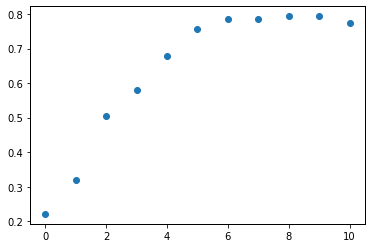

In [17]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_5.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_5.index
y = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

recall_list = [f1_score(y, x.loc[order].qvals <= 0.05) for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, 
                                                                psix_150, psix_200, psix_300, psix_400, psix_500]]
plt.scatter(range(len(recall_list)), recall_list)

In [18]:
platonic_psi = pd.read_csv('single_lineage/sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


In [19]:
meta = pd.read_csv('three_lineages/sim_output/meta.tab.gz', sep='\t')
meta.index=['cell_'+str(i+1) for i in range(1000)]

# pop_1 = meta.loc[meta['pop'] == '3_1'].index
# pop_2 = meta.loc[meta['pop'] == '3_2'].index
# labels = [pop_1, pop_2]

In [5]:
import os
psix_three_lineages_1 = psix.Psix()
psix_three_lineages_1.process_rnaseq(
        'three_lineages/processed_tables/SE_counts_0.1.tab.gz',
        'three_lineages/processed_tables/constitutive_introns_0.1.tab.gz',
        'three_lineages/processed_tables/tpm_0.1.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

os.mkdir('k_sensitivity_3lineages')


psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=5)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_5.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=10)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_10.tab.gz', sep='\t', index=True, header=True)


psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=20)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_20.tab.gz', sep='\t', index=True, header=True)


psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=30)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_30.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=50)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_50.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_100.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=150)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_150.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=200)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_200.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=250)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_250.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=300)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_300.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=400)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_400.tab.gz', sep='\t', index=True, header=True)

psix_three_lineages_1.compute_psix_scores(latent='three_lineages/processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=500)
psix_three_lineages_1.psix_results.to_csv('k_sensitivity_3lineagesk_500.tab.gz', sep='\t', index=True, header=True)


Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados
luigi
prueba 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 4509.20it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:34<00:00, 98.75it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 35964.64it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:36<00:00, 94.14it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 24780.24it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 97.39it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 19826.91it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:36<00:00, 95.60it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 1000/1000 [00:00<00:00, 14261.73it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 96.35it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 63%|██████▎   | 627/1000 [00:00<00:00, 6269.30it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 6212.04it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 95.74it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 58%|█████▊    | 576/1000 [00:00<00:00, 5759.65it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 5716.97it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 97.32it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 88%|████████▊ | 875/1000 [00:00<00:00, 4377.20it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 4349.36it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 97.33it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 34%|███▍      | 344/1000 [00:00<00:00, 3436.86it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 3398.69it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:34<00:00, 99.21it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 26%|██▌       | 259/1000 [00:00<00:00, 2580.33it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 2611.89it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:32<00:00, 106.57it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 18%|█▊        | 179/1000 [00:00<00:00, 1788.88it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 1753.16it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 97.65it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


 14%|█▍        | 142/1000 [00:00<00:00, 1415.51it/s]

Successfully estimated p-values
cell-cell metric not found. Computing metric...


100%|██████████| 1000/1000 [00:00<00:00, 1411.23it/s]

Successfully computed cell-cell metric
Computing Psix score in 3444 exons



100%|██████████| 3444/3444 [00:35<00:00, 97.86it/s]  


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:32<00:00, 20.51s/it]  


Successfully estimated p-values


In [20]:
psix_5 = pd.read_csv('k_sensitivity/k_5.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('k_sensitivity/k_10.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('k_sensitivity/k_20.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('k_sensitivity/k_30.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('k_sensitivity/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('k_sensitivity/k_100.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('k_sensitivity/k_150.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('k_sensitivity/k_200.tab.gz', sep='\t', index_col=0)
psix_300 = pd.read_csv('k_sensitivity/k_300.tab.gz', sep='\t', index_col=0)
psix_400 = pd.read_csv('k_sensitivity/k_400.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('k_sensitivity/k_500.tab.gz', sep='\t', index_col=0)

In [21]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

platonic_psi = pd.read_csv('single_lineage/sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


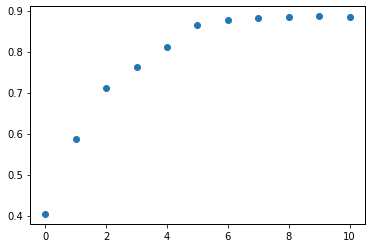

In [22]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_5.index

pos = []
neg = []
order = []
y = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)
            pos.append('gene'+str(i+1))
            order.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))
            y.append(0)
            order.append('gene'+str(i+1))
    
    

recall_list = [f1_score(y, x.loc[order].qvals <= 0.05) for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, 
                                                                psix_150, psix_200, psix_300, psix_400, psix_500]]
plt.scatter(range(len(recall_list)), recall_list)

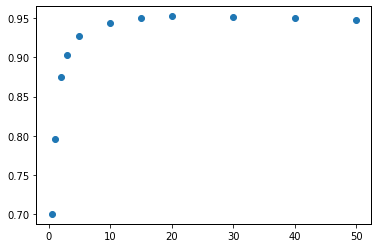

In [23]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_5.index

pos = []
neg = []
order = []
y = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)
            pos.append('gene'+str(i+1))
            order.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))
            y.append(0)
            order.append('gene'+str(i+1))
    
    
recall_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    pre, rec, thres = precision_recall_curve(y, x.loc[order].psix_score)
    
    recall_list.append(auc(rec, pre))

# recall_list = [f1_score(y, x.loc[order].qvals <= 0.05) for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, 
#                                                                 psix_150, psix_200, psix_300, psix_400, psix_500]]
plt.scatter([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50], recall_list)


In [27]:
pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))

    
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

    
y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

boxplot_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    
    box = []
    for i in range(200):
        
        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])
        
        
        pre, rec, thres = precision_recall_curve(y_, x.loc[order].psix_score)
    
        box.append(auc(rec, pre))

    boxplot_list.append(box)

([<matplotlib.axis.XTick at 0x7f9ced849950>,
 [Text(0, 0, '0.5%'),
  Text(0, 0, '1%'),
  Text(0, 0, '2%'),
  Text(0, 0, '5%'),
  Text(0, 0, '10%'),
  Text(0, 0, '20%'),
  Text(0, 0, '50%')])

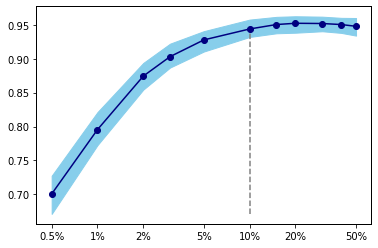

In [25]:
plt.fill_between(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), [np.quantile(x, 0.05) for x in boxplot_list], 
                 [np.quantile(x, 0.95) for x in boxplot_list], color='skyblue')
plt.plot([1, 1], [np.quantile(boxplot_list[0], 0.05), recall_list[5]], linestyle='--', c='gray')

plt.scatter(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20)

plt.plot(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20)

plt.xticks(np.log10(np.array([0.5, 1, 2, 5, 10, 20, 50])),
          ['0.5%', '1%', '2%', '5%', '10%', '20%', '50%'])
# plt.boxplot(boxplot_list, positions=[0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])

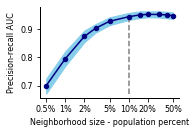

In [28]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.fill_between(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), [np.quantile(x, 0.05) for x in boxplot_list], 
                 [np.quantile(x, 0.95) for x in boxplot_list], color='skyblue')

ax.plot([1, 1], [np.quantile(boxplot_list[0], 0.05), recall_list[5]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([0.5, 1, 2, 5, 10, 20, 50])))

ax.set_xticklabels(['0.5%', '1%', '2%', '5%', '10%', '20%', '50%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

ax.set_yticks([0.7, 0.8, 0.9])
ax.set_yticklabels(['0.7', '0.8', '0.9'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])

plt.savefig('three_lineages/sub_plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)
